In [ ]:
Simple overview about the scraped dataset

In [2]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### <h2>Downloading And Scraping a Web Page: https://www.worlddata.info/average-income.php </h2>
          
  


In [3]:
url = "https://www.worlddata.info/average-income.php"

In [4]:
data  = requests.get(url).text 

In [5]:
soup = BeautifulSoup(data,"html5lib")  

#### Scrape data from HTML   


In [7]:
#find all html tables in the web page
tables = soup.find_all('table')  

In [57]:
# we can see number of tables found  
len(tables)

1

In [ ]:
Try to have a table index

In [8]:
for index,table in enumerate(tables):
    if ("Rank" in str(table)):
        table_index = index
print(table_index)

0


### Creating a dataframe 

In [9]:
income_world = pd.DataFrame(columns=["Rank", "Country", "Avg. income per year", "Avg. income per month"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        rank = col[0].text
        country = col[1].text
        salary_year = col[2].text#.strip()#.split('$')
        salary_month = col[3].text#.strip()
         
        income_world = income_world.append({"Rank":rank, "Country":country, "Avg. income per year":salary_year, "Avg. income per month":salary_month}, ignore_index=True)

income_world

,Rank,Country,Avg. income per year,Avg. income per month
0,1,Monaco,"186,080 $","15,507 $"
1,2,Luxembourg,"73,900 $","6,158 $"
2,3,New Zealand,"42,610 $","3,551 $"
3,4,France,"42,290 $","3,524 $"
4,5,Andorra,"40,650 $","3,388 $"
...,...,...,...,...
60,61,Sudan,650 $,54 $
61,62,Liberia,530 $,44 $
62,63,Central Africa,510 $,43 $
63,64,Afghanistan,500 $,42 $


In [65]:
### $ sign is not usable for an analysis

In [10]:
income_world['Avg. income per year'] = income_world['Avg. income per year'].astype(str)
income_world['Avg. income per year'] = income_world['Avg. income per year'].str.replace("$", '')
income_world['Avg. income per month'] = income_world['Avg. income per month'].astype(str)
income_world['Avg. income per month'] = income_world['Avg. income per month'].str.replace("$", '')
print (income_world[:10]) 

  Rank       Country Avg. income per year Avg. income per month
0    1        Monaco             186,080                15,507 
1    2    Luxembourg              73,900                 6,158 
2    3   New Zealand              42,610                 3,551 
3    4        France              42,290                 3,524 
4    5       Andorra              40,650                 3,388 
5    6        Kuwait              36,290                 3,024 
6    7   South Korea              32,860                 2,738 
7    8  Saint Martin              27,680                 2,307 
8    9       Estonia              23,230                 1,936 
9   10      Portugal              22,000                 1,833 


### Lets look at data types

In [11]:
income_world.dtypes

Rank                     object
Country                  object
Avg. income per year     object
Avg. income per month    object
dtype: object

All of that data are the object type. Converting datatypes to the right format would be better.

In [11]:
income_world["Rank"] = income_world["Rank"].astype("int")
income_cols = ['Avg. income per year','Avg. income per month']

for x in income_cols:
    income_world[x] = income_world[x].str.replace("$","")
    income_world[x] = income_world[x].str.replace(",","")
    income_world[x] = pd.to_numeric(income_world[x])

income_world.head()

,Rank,Country,Avg. income per year,Avg. income per month
0,1,Monaco,186080,15507
1,2,Luxembourg,73900,6158
2,3,New Zealand,42610,3551
3,4,France,42290,3524
4,5,Andorra,40650,3388


In [46]:
income_world.dtypes

Rank                      int32
Country                  object
Avg. income per year      int64
Avg. income per month     int64
dtype: object

In [58]:
### It coud be like above for this time.

In [12]:
income_world.describe()

,Rank,Avg. income per year,Avg. income per month
count,67.000000,67.000000,67.000000
mean,34.000000,13640.149254,1136.716418
std,19.485037,21563.556271,1796.969720
min,1.000000,460.000000,38.000000
25%,17.500000,1795.000000,150.000000
50%,34.000000,4720.000000,393.000000
75%,50.500000,14845.000000,1237.000000
max,67.000000,116430.000000,9703.000000


In [42]:
income_world['Country'].unique()

array(['Monaco', 'Luxembourg', 'New Zealand', 'France', 'Andorra',
       'Kuwait', 'South Korea', 'Saint Martin', 'Estonia', 'Portugal',
       'Czechia', 'Puerto Rico', 'Palau', 'French Polynesia',
       'Trinidad and Tobago', 'Barbados', 'New Caledonia',
       'Virgin Islands', 'China', 'Mauritius', 'Bulgaria', 'Saint Lucia',
       'Grenada', 'Montenegro', 'Cuba', 'Dominican Republic', 'Guyana',
       'Belarus', 'Bosnia and Herzegovina', 'Peru', 'Tuvalu', 'Ecuador',
       'Suriname', 'Marshall Islands', 'Jamaica', 'Guatemala',
       'Azerbaijan', 'Jordan', 'Georgia', 'Indonesia', 'Djibouti',
       'Bolivia', 'Iran', 'Nigeria', 'Timor-Leste', 'Syria', 'Kenya',
       'Uzbekistan', 'Cambodia', 'Haiti', 'Zambia', 'Lesotho', 'Tanzania',
       'Tajikistan', 'Yemen', 'Togo', 'Mali', 'Burkina Faso', 'Rwanda',
       'Guinea-Bissau', 'Sudan', 'Liberia', 'Central Africa',
       'Afghanistan', 'Somalia'], dtype=object)

In [60]:
#Let´s look at the income according to country: monthly/yearly + rank

In [36]:
income_world_one = income_world[['Country','Avg. income per month','Avg. income per year','Rank']]

In [41]:
income_world_one.transpose()  

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Country,Monaco,Luxembourg,New Zealand,France,Andorra,Kuwait,South Korea,Saint Martin,Estonia,Portugal,...,Togo,Mali,Burkina Faso,Rwanda,Guinea-Bissau,Sudan,Liberia,Central Africa,Afghanistan,Somalia
Avg. income per month,15507,6158,3551,3524,3388,3024,2738,2307,1936,1833,...,77,69,66,65,63,54,44,43,42,26
Avg. income per year,186080,73900,42610,42290,40650,36290,32860,27680,23230,22000,...,920,830,790,780,760,650,530,510,500,310
Rank,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65


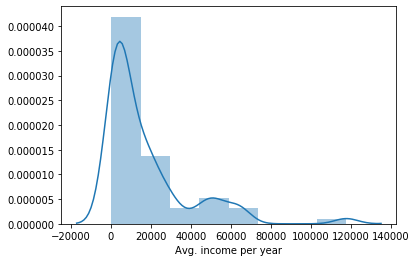

In [89]:
sns.distplot(income_world['Avg. income per year'], bins=8) 

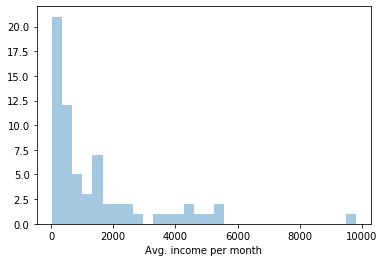

In [90]:
sns.distplot(income_world['Avg. income per month'], kde = False , bins = 30)

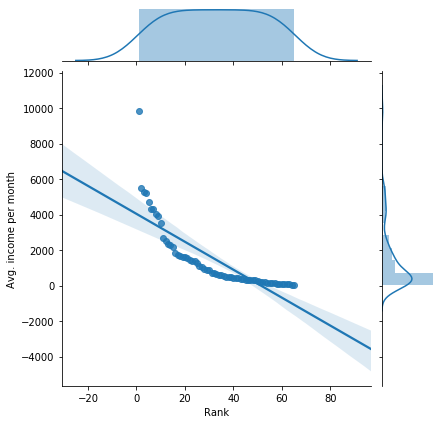

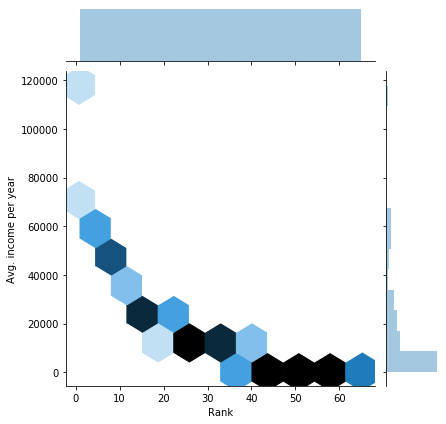

In [107]:
sns.jointplot(x=income_world['Rank'], y= income_world['Avg. income per month'],data=income_world,kind='reg') #plot in the right side
sns.jointplot(x=income_world['Rank'], y= income_world['Avg. income per year'],data=income_world,kind='hex') # plot in the left

In [ ]:
# Another way, we can convert this data to the csv file:

In [49]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

In [50]:
pd.read_html(url, match="Country", flavor='bs4')[0][:10]

,Rank,Country,Avg. income per year,Avg. income per month
0,1,Bermuda,"117,740 $","9,812 $"
1,2,Norway,"78,250 $","6,521 $"
2,3,Macao,"75,610 $","6,301 $"
3,4,Iceland,"72,930 $","6,078 $"
4,5,United States,"65,910 $","5,493 $"
5,6,Ireland,"63,470 $","5,289 $"
6,7,Denmark,"62,720 $","5,227 $"
7,8,Singapore,"54,920 $","4,577 $"
8,9,Austria,"51,390 $","4,283 $"
9,10,Finland,"49,620 $","4,135 $"


In [51]:
df = pd.read_html(url, match="Country", flavor='bs4')[0]
df

,Rank,Country,Avg. income per year,Avg. income per month
0,1,Bermuda,"117,740 $","9,812 $"
1,2,Norway,"78,250 $","6,521 $"
2,3,Macao,"75,610 $","6,301 $"
3,4,Iceland,"72,930 $","6,078 $"
4,5,United States,"65,910 $","5,493 $"
...,...,...,...,...
64,65,Guinea-Bissau,760 $,63 $
65,66,Chad,660 $,55 $
66,67,Eritrea,600 $,50 $
67,68,Sierra Leone,490 $,41 $


In [52]:
df.to_csv("Salaries.csv")

In [55]:
df = pd.read_csv("Salaries.csv")
df.head()

,Unnamed: 0,Rank,Country,Avg. income per year,Avg. income per month
0,0,1,Bermuda,"117,740 $","9,812 $"
1,1,2,Norway,"78,250 $","6,521 $"
2,2,3,Macao,"75,610 $","6,301 $"
3,3,4,Iceland,"72,930 $","6,078 $"
4,4,5,United States,"65,910 $","5,493 $"


In [61]:
#But this time we can focus on the visualization part-again

Text(0.5, 1.0, 'The top Income per Country- yearly')

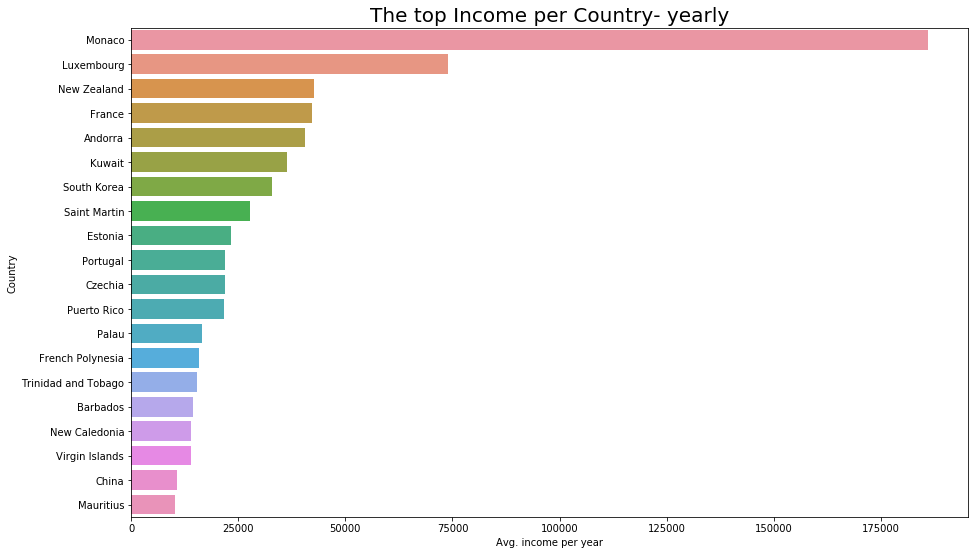

In [56]:
plt.figure(figsize=(15,9))
sns.barplot(x='Avg. income per year', y='Country',data=income_world[:20] )
plt.title('The top Income per Country- yearly', fontsize=20)

In [ ]:
#The top 5 are: Monaco, Luxemburg, New Zealand, France and Andorra

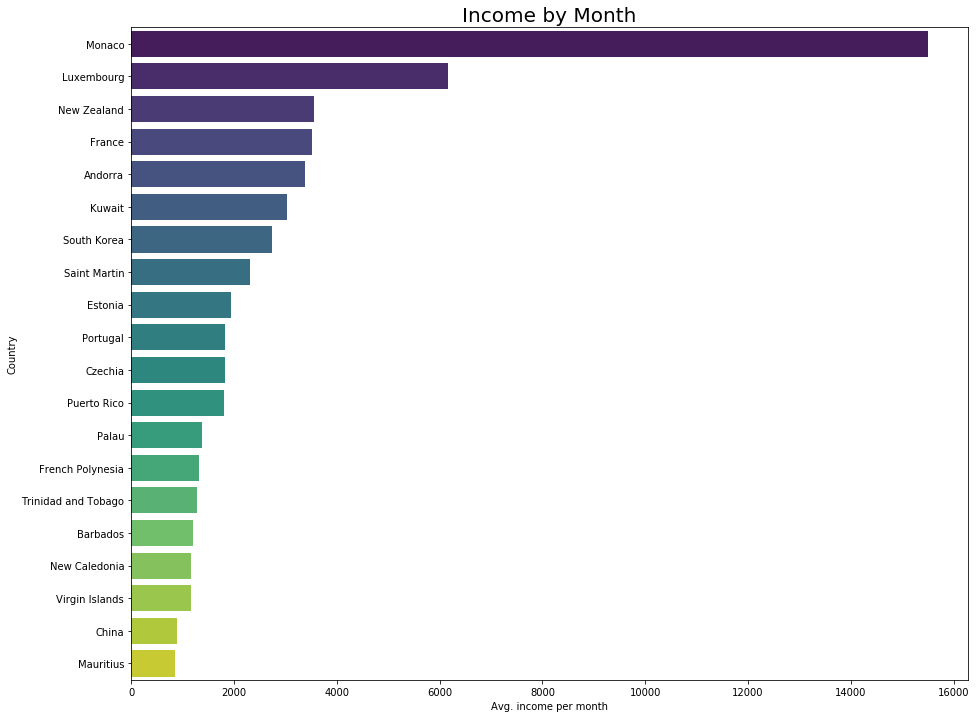

In [62]:
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=income_world['Avg. income per month'],y=income_world['Country'][:20], data=income_world, palette='viridis').set_title(
            'Income by Month', fontsize=20);

In [ ]:
#The top 5 monthly are: Monaco, Luxemburg, New Zealand, France and Andorra again

### Comparing both plots, if they are nearly the same again:

Text(0.5, 1.0, 'Average Income per Month ')

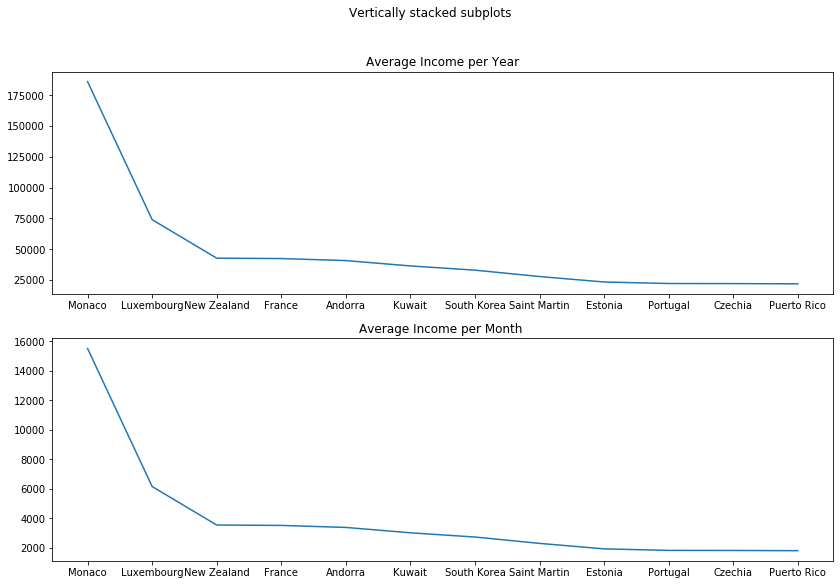

In [48]:
fig, axs = plt.subplots(2, figsize=(14, 9)) 
fig.suptitle('Vertically stacked subplots')

axs[0].plot(income_world['Country'][:12], income_world['Avg. income per year'][:12])  
axs[0].set_title('Average Income per Year')
axs[1].plot(income_world['Country'][:12], income_world['Avg. income per month'][:12]) 
axs[1].set_title('Average Income per Month ')

In [ ]:
#Just the same according to salary monthly vs yearly  

### Below you can find another comparison in plotly:

In [12]:
import cufflinks as cf
import chart_studio.plotly
import plotly.tools
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

In [14]:
px.scatter_3d(income_world, 
              x='Country', 
              y='Avg. income per year', 
              z='Avg. income per month', color='Avg. income per year')

In [16]:
fig = px.scatter(income_world, x=income_world.Country, y=income_world['Avg. income per year'], color=income_world['Avg. income per month'], size=income_world['Avg. income per year']) 
 
fig.show()

In [23]:
fig = px.pie(income_world[:22], values='Avg. income per month', names='Country', title='The Countries proportion of salary by month')
fig.show()

In [ ]:
# According to this data for me was a very surprising finding that a country France: 
# is on the 4th place in average income monthly/yearly, amazing. 